# Data Wrangling and Analysis (WeRateDogs)

**Data Gathering**

- import all required python libraries
- read the twitter_achieved_enhanced.csv file 
- download the image-predictions.tsv file using Request
- download the tweet-json.txt file using Request
- reading the Json.txt file line by line into Pandas DataFrame with tweet_id, retweet_count and favorite_count

Import the Neccessary liberies

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import requests
import json
import tweepy
import re
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
#Imporing my twitter_achieved_enhanced dataset
twitter_achieved_enhanced  = pd.read_csv(r'C:\Users\Master Ridwan\Desktop\my data\twitter-archive-enhanced.csv', header = 0)

Download the image-predictions.tsv using Request, Next, load it as a dataframe into tweet image

In [4]:
#downloading tweet image pragrammically using the url provided
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# saving it to file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    


In [3]:
#load the tweet image into dataframe
tweet_image = pd.read_csv('image-predictions.tsv', sep = '\t')

Load the tweet json file directly and read it line by line into Datafram with tweet_id, retweet_count and favorite_count

In [4]:
#load the json file into dataframe
json_file = pd.read_csv('tweet-json.txt', sep = "\t",)

In [5]:
#reading the Json.txt file line by line into DataFrame with tweet_id, retweet_count and favorite_count
file = []
with open('tweet-json.txt') as json_file:
    
    #accessing each column in full json_file
    for col in json_file:
        #load each column into tweet
        tweet = (json.loads(col))
        
        #extracting the needed columns
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        #gathering the needed into the file dict
        file.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
#save the file into a dataframe name tweet_attribute (tweet_attr)
tweet_attr = pd.DataFrame(file, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Data Assessment 

 **Visual Assessment**

In [6]:
#Loading my twitter_achieved_enhanced.csv for Assessment 
twitter_achieved_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
##Loading my image-predictions.tsv for virtual Assessment 
tweet_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
###Loading my image-predictions.tsv for Virtual Assessment 
tweet_attr

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatical Assessment

1. **Programmatical Assessment of twitter_achieved_enhanced dataset**

In [9]:
#copy the original dataset to tweet_df
#tweet_df = twitter_achieved_enhanced.copy()

In [10]:
#check for the number of rows and columns we have in the dataset
twitter_achieved_enhanced.shape

(2356, 17)

In [11]:
#check if we have any null value
twitter_achieved_enhanced.isnull().sum()
                               

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
#check for more informaton about the dataset(dtype, non-null count)
twitter_achieved_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#check if we have any duplicated row
twitter_achieved_enhanced.duplicated().sum()

0

In [14]:
#check for duplicate in each column too
def is_duplicate(col):
    duplicate = twitter_achieved_enhanced[col].duplicated().any()
    return duplicate

In [15]:
#check for duplicate
is_duplicate('tweet_id')

False

In [16]:
#check for duplicate
is_duplicate('source')

True

In [17]:
#check for duplicate
is_duplicate('text')

False

In [18]:
#check for duplicate
is_duplicate('expanded_urls')

True

In [19]:
#Show the the deplicated values in the 'source' column
twitter_achieved_enhanced[twitter_achieved_enhanced.source.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- Its okay we have duplicates from the source which shows that many people tweet from the same source.

In [20]:
#Show the the deplicated value in the 'expanded_urls' column
twitter_achieved_enhanced[twitter_achieved_enhanced.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [21]:
#check for the number of unique vale in 'rating_denominator' column
twitter_achieved_enhanced['rating_denominator'].nunique()

18

In [22]:
#check for the number of time each unique value appeared in column 'rating_denominator'
twitter_achieved_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [23]:
#check for the number of unique value in 'rating_numerator' column
twitter_achieved_enhanced['rating_numerator'].nunique()

40

In [24]:
#check for the number of time each unique value appeared
twitter_achieved_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [25]:
#check for the list of unique value in 'name' column
twitter_achieved_enhanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [26]:
#check for the total number of unique value in 'name' column
twitter_achieved_enhanced['name'].nunique()

957

In [27]:
#check for the top (20)  unique value count we have 
twitter_achieved_enhanced['name'].value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

- There are some odd names of dogs such as 'a', 'an', 'the', 'None' that are included. 

In [28]:
#check for the number of each unique value in column 'doggo'
twitter_achieved_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [29]:
#check for the number of each unique value in column 'floofer'
twitter_achieved_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [30]:
#check for the number of each unique value in column 'puppo'
twitter_achieved_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
#check for the number of each unique value in column 'pupper'
twitter_achieved_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

- Each stage name of dog occupy different columns repectively. its best to unpivot them all into one column 

2. **Programmatical Assessment of image-predictions.tsv**

In [32]:
#load the data tweet_image
tweet_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [33]:
#check for the structure of the data
tweet_image.shape

(2075, 12)

In [34]:
#Check for the sum of null value presence 
tweet_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
#check if there is any duplicated row in the dataframe
tweet_image[tweet_image.duplicated (keep = 'first')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [37]:
#Check the tweet_id with duplicated 'jpg_url'
tweet_image[tweet_image['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


- it shows we have a number of same jpeg_url been sumbitted 

In [38]:
#check for the number of each unique value in column 'img_num'
tweet_image['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [39]:
#check the frequnency of the algorithm's dog breed 1 prediction 
tweet_image['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [40]:
#Check for the mean of dog breed p1 whose prediction is above 0.5 
percentage1 =tweet_image['p1_conf'] > 0.5
percentage1.mean()

0.5971084337349397

In [41]:
#the count of dog breed p1 whose prediction is above 0.5 
percentage1.value_counts()

True     1239
False     836
Name: p1_conf, dtype: int64

In [42]:
#check the frequnency of the algorithm's dog breed p2 prediction 
tweet_image['p2'].value_counts().head(10)

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
Chesapeake_Bay_retriever     41
French_bulldog               41
toy_poodle                   37
cocker_spaniel               34
miniature_poodle             33
Name: p2, dtype: int64

In [43]:
#Check for the mean of dog breed p1 whose prediction is above 0.5 
percentage2 =tweet_image['p2_conf'] > 0.5

In [44]:
percentage2.mean()

0.0

In [45]:
#check the frequnency of the algorithm's dog breed p3 prediction 
tweet_image['p3'].value_counts().head(10)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
Staffordshire_bullterrier    32
chow                         32
beagle                       31
cocker_spaniel               31
Name: p3, dtype: int64

In [46]:
#Check for the mean of dog breed p3 whose prediction is above 0.5 
percentage3 =tweet_image['p3_conf'] > 0.5

In [47]:
percentage3.mean()

0.0

In [48]:
tweet_image['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [49]:
tweet_image['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [50]:
tweet_image['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

3. **Programmatical Assessment of json file**

In [51]:
#Load the data
tweet_attr

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [52]:
#check for the sum of null value
tweet_attr.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [53]:
#check for more info on the the dtype
tweet_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [54]:
#check for duplicate
tweet_attr.duplicated().sum()

0

In [55]:
#check for the maximum retweet_count
tweet_attr['retweet_count'].max()

79515

In [56]:
#check for the minimum retweet_count
tweet_attr['retweet_count'].min()

0

In [57]:
#check for the maximum favorite_count
tweet_attr['favorite_count'].max()

132810

In [58]:
#check for the minimum favorite_count
tweet_attr['favorite_count'].min()

0

### Quality Issues

   **twitter_achieved_enhanced**
1. The datatypes of these columns(tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_user_id) should be in string not float.

2. The columns (timestamp,retweeted_status_timestamp) are stored as object rather than datatime

3. The columns (doggo, floofer, pupper, puppo) all have a value 'None' present instead of  'Nan' 

4. The columns 'name' have some odd values such as 'a', 'the' as the stage name 

5. The columns(expanded_urls) have some duplicated value

6. Columns that contain Retweet data (retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp) are not needed. we only want to work with real tweets NOT retweets  

7. Also columns that contain reply tweets data(in_reply_to_status_id, in_reply_to_user_id) are not needed since they are not the real tweets
 
 **image-predictions.tsv**
 
8. tweet_id is stored in int instead of string
9. many tweet_id have a duplicated jgp_url

 **json_ file**
10. tweet_id is stored in int instead of string

# **Tidiness Issues**

1. columns like (doggo, floofer, pupper, puppo) should be melt in a single column.

2. All datasets should be merge into one under tweet_id

# Cleaning Data

1. **Cleaning process of the twitter_achieved_enhanced dataset**

**Define**: Make a copy of the original dataset

**Code**

In [59]:
#make a copy of the original data for cleaning
tweet_df_cleaned = twitter_achieved_enhanced.copy()

**Test**

In [60]:
tweet_df_cleaned.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Define**: Convert datatype to the suitable format(object, timestamp)

**Code**

In [61]:
#change these columns dtype to string and int respecively
tweet_df_cleaned['tweet_id'] = tweet_df_cleaned['tweet_id'].astype(object)
tweet_df_cleaned['in_reply_to_status_id'] = tweet_df_cleaned['in_reply_to_status_id'].astype(object)
tweet_df_cleaned['in_reply_to_user_id'] = tweet_df_cleaned['in_reply_to_user_id'].astype(object)
tweet_df_cleaned['retweeted_status_id'] = tweet_df_cleaned['retweeted_status_id'].astype(object)
tweet_df_cleaned['retweeted_status_user_id'] = tweet_df_cleaned['retweeted_status_user_id'].astype(object)

In [62]:
#change the  'timestamp' and 'retweeted_status_timestamp' dtype to datetime format
tweet_df_cleaned['timestamp'] = pd.to_datetime(tweet_df_cleaned['timestamp'])
tweet_df_cleaned['retweeted_status_timestamp'] = pd.to_datetime(tweet_df_cleaned['retweeted_status_timestamp'])

**Test**

In [63]:
# Check if the correction is implimented
tweet_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Define:** Extract the Phone source of each tweet from the source column

**Code**

In [64]:
#Using regres to split the source url extracting only the last phrase which indicate the user mobile phone
tweet_df_cleaned['source'] = tweet_df_cleaned['source'].apply(lambda x:re.findall(r'>(.*)<',x)[0])

**Test**

In [65]:
#check if the source is extracted
tweet_df_cleaned['source'].head(5)

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

**Define:** Create a column to combine both the rating_numerator and rating_denominator together

**Code:**

In [66]:
#create rating column to hold both rating_numerator and rating_denominator
tweet_df_cleaned['rating'] = tweet_df_cleaned['rating_numerator'].astype(str) + '/'+ tweet_df_cleaned['rating_denominator'].astype(str)

**Test**

In [67]:
#show if implimented
tweet_df_cleaned['rating'].head(5)

0    13/10
1    13/10
2    12/10
3    13/10
4    12/10
Name: rating, dtype: object

**Define:** Remove all invalid names from the column 'names' (most of which start with a lowercase letter)

**Code**

In [68]:
#check for unique value again.
tweet_df_cleaned['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [69]:
#check for the total number of unique value
tweet_df_cleaned['name'].nunique()

957

In [70]:
#show the dataframe that contain only lowercase
tweet_df_cleaned[tweet_df_cleaned.name.str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None,14/10
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None,14/10
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24+00:00,Twitter for iPhone,RT @dog_rates: We only rate dogs. This is quit...,859196978902773760.0,4196983835.0,2017-05-02 00:04:57+00:00,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None,12/10
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57+00:00,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None,12/10
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22+00:00,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None,2/10
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50+00:00,Twitter for iPhone,This is a truly beautiful English Wilson Staff...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None,10/10
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,6/10
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,9/10


In [71]:
#remove all invalid names(mostly in lower case) within the column
tweet_df_cleaned['name'] = tweet_df_cleaned.name.mask(tweet_df_cleaned.name.str.match(r'^[a-z]+$')) # ^[a-z\s]+$


In [72]:
#rename the name represented as (None, such, a,an,the) to NaN
tweet_df_cleaned['name'].replace('None', np.NAN, inplace = True)

**Test**

In [73]:
tweet_df_cleaned['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

In [74]:
tweet_df_cleaned['name'].nunique()

931

**Define**: Merge all the dog stage names in different column into only one column 

**Code**

In [75]:
# merge different dog types into a column dog_class
tweet_df_cleaned['dog_class'] = tweet_df_cleaned[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
tweet_df_cleaned['dog_class'] = tweet_df_cleaned['dog_class'].str.replace(r'(None,)', repl='')
tweet_df_cleaned.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

In [76]:
#rename the dog_class represented as 'None' to NaN
tweet_df_cleaned['dog_class'].replace('None', np.NAN, regex = True, inplace = True)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,NaN


In [77]:
#changing the new column to category datatype
tweet_df_cleaned['dog_class']= tweet_df_cleaned['dog_class'].astype('category')

**Test**

In [121]:
#Check if changes is implimented
pd.set_option('display.max_rows',None)
tweet_df_cleaned

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_class
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,13/10,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,13/10,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,13/10,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,13/10,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,14/10,doggo


**Define**: Drop the Duplicated tweet_id

**Code**

In [79]:
tweet_df_cleaned['tweet_id'].duplicated().sum()

0

In [80]:
#drop tweet_id in duplicates
tweet_df_cleaned.drop_duplicates('tweet_id', keep = 'first')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,5/10,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,6/10,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,9/10,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,7/10,NaN


**Test**

In [81]:
tweet_df_cleaned['tweet_id'].duplicated().sum()

0

**Define**:Dropping the rows that contain retweet data

**Code**

In [82]:
#lets keep the rows that do not have retweet by selecting null in the retweet filled columns
#(retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp)
tweet_df_cleaned = tweet_df_cleaned[tweet_df_cleaned.retweeted_status_id.isnull()]
tweet_df_cleaned = tweet_df_cleaned[tweet_df_cleaned.retweeted_status_user_id.isnull()]
tweet_df_cleaned = tweet_df_cleaned[tweet_df_cleaned.retweeted_status_timestamp.isnull()]

In [83]:
#drop the retweets column(retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp)
tweet_df_cleaned.drop([ 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace= True, axis=1)

**Test**

In [84]:
tweet_df_cleaned.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,NaN


**Define**:Dropping the rows that contain reply data
    

**Code**:

In [85]:
#lets keep the rows that do not have tweet reply data by selecting null in the reply filled column
#(in_reply_to_status_id,in_reply_to_user_id)
tweet_df_cleaned = tweet_df_cleaned[tweet_df_cleaned.in_reply_to_status_id.isnull()]
tweet_df_cleaned = tweet_df_cleaned[tweet_df_cleaned.in_reply_to_user_id.isnull()]

In [86]:
#drop the reply column(in_reply_to_status_id, in_reply_to_user_id)
tweet_df_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], inplace= True, axis=1)

**Test**

In [87]:
tweet_df_cleaned.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_class
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,NaN


2. ***Cleaning process of the image-predictions.tsv data***

**Define**: Make a copy of the original dataset

**Code**

In [88]:
#make a copy of the original dataset
tweet_image_cleaned = tweet_image.copy()

**Test**

In [89]:
#load the first rows
tweet_image_cleaned.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define**:Change the datatype of the tweet_id to object

**Code**

In [90]:
#chnage the tweet_id to an object datatype
tweet_image_cleaned['tweet_id'] = tweet_image_cleaned['tweet_id'].astype(object)

**Test**

In [91]:
#check for chnages
tweet_image_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Define**: Drop duplicate of the 'jpg_url' column

**Code**

In [92]:
#drop duplicates of jpg_url
tweet_image_cleaned.drop_duplicates(subset = 'jpg_url', inplace =True)

**Test**

In [93]:
#check for changes
tweet_image_cleaned[tweet_image_cleaned['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Define**: Create two columns name dog breed and confidence level. of the spreaded columns of the dog breeds prediction flag (p1,p2,p3), copy the one with the most confidence level together with its stated confidence level into the newly created column 'dog breed' and'confidence level' respectively. Occupy the columns with none with neither of it meet the specicification of a dog. later drop the spreaded columns

**Code**

In [94]:
#select if what we have (p1_dog,p2_dog, p3_dog )is a dog
conditions = [(tweet_image_cleaned['p1_dog'] == True), (tweet_image_cleaned['p2_dog'] == True),
              (tweet_image_cleaned['p3_dog'] == True)]

# store the columns(p1,p2,p3) into breed_name
breed_name = [tweet_image_cleaned['p1'], tweet_image_cleaned['p2'], tweet_image_cleaned['p3']]

#store the columns(p1_conf,p2_conf,p3_conf) into confidence_level
confidence_level = [tweet_image_cleaned['p1_conf'], tweet_image_cleaned['p2_conf'], tweet_image_cleaned['p3_conf']]

# select the predicted dog breed based on the first successful condition and placing in new dog breed column
tweet_image_cleaned['dog_breed'] = np.select(conditions, breed_name, default = 'none')

# select the predicted confidence level based on the first successful encounter in the condition list
tweet_image_cleaned['confidence'] = np.select(conditions, confidence_level, default = 0)

#drop the prediction and confidence level columns we have previously
tweet_image_cleaned.drop(tweet_image_cleaned.iloc[:,2:12], inplace= True, axis=1)

In [95]:
#replace the 'none' with 'nan' 
tweet_image_cleaned['dog_breed'].replace('none', np.NAN, inplace =True)

In [96]:
#drop the nan value
tweet_image_cleaned.dropna(axis= 0, subset='dog_breed', inplace= True)

**Test**

In [97]:
tweet_image_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   object 
 1   jpg_url     1691 non-null   object 
 2   dog_breed   1691 non-null   object 
 3   confidence  1691 non-null   float64
dtypes: float64(1), object(3)
memory usage: 66.1+ KB


### **Define:** Merge all three datasets together

**Code**

In [98]:
#merging tweet_df_cleaned and tweet_image_cleaned first
tweet_image_merge =pd.merge(tweet_df_cleaned, tweet_image_cleaned, how= 'inner', on ='tweet_id')

In [99]:
#merge tweet_image_merge and tweet_attr
cleaned_twitter_archieve = pd.merge(tweet_image_merge, tweet_attr, how='inner', on= 'tweet_id')

**Test**

In [100]:
#show the first 3 row
cleaned_twitter_archieve.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_class,jpg_url,dog_breed,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908


**Define**: save the merged dataset as twitter_archive_master.csv

**Code**

In [101]:
cleaned_twitter_archieve.to_csv("twitter_archive_master.csv", index= False)

# Analysis and Visualizations

In [102]:
cleaned_twitter_archieve

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_class,jpg_url,dog_breed,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,13/10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,5/10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,41,111
1662,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,6/10,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,147,311
1663,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,9/10,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,47,128
1664,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,7/10,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,48,132


In [103]:
cleaned_twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   object             
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   source              1666 non-null   object             
 3   text                1666 non-null   object             
 4   expanded_urls       1666 non-null   object             
 5   rating_numerator    1666 non-null   int64              
 6   rating_denominator  1666 non-null   int64              
 7   name                1186 non-null   object             
 8   rating              1666 non-null   object             
 9   dog_class           63 non-null     category           
 10  jpg_url             1666 non-null   object             
 11  dog_breed           1666 non-null   object             
 12  confidence          1666 non-null 

In [104]:
#extract the specfic day, month and year of the tweet
cleaned_twitter_archieve['tweet_day'] = cleaned_twitter_archieve['timestamp'].dt.day_name()
cleaned_twitter_archieve['tweet_month'] = cleaned_twitter_archieve['timestamp'].dt.month_name()
cleaned_twitter_archieve['tweet_year']  = pd.DatetimeIndex(cleaned_twitter_archieve['timestamp']).year

In [105]:
#lets drop the 'timestamp' column
cleaned_twitter_archieve.drop('timestamp', axis = 1, inplace = True)

In [106]:
#show the first 3 rows
cleaned_twitter_archieve.head(3)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_class,jpg_url,dog_breed,confidence,retweet_count,favorite_count,tweet_day,tweet_month,tweet_year
0,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819,Tuesday,August,2017
1,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461,Monday,July,2017
2,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908,Sunday,July,2017


In [107]:
#check tweet frequency of each day of week
cleaned_twitter_archieve['tweet_day'].value_counts()

Monday       280
Thursday     244
Tuesday      241
Friday       238
Wednesday    237
Sunday       221
Saturday     205
Name: tweet_day, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'The Frequency of tweets per day')

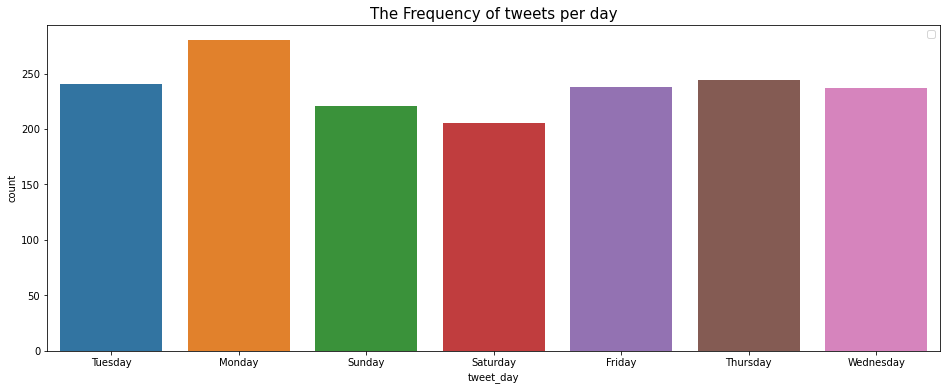

In [108]:
#show the count plot of the number of tweets per day of the week
plt.figure(figsize = (16, 6))
sns.countplot(x = 'tweet_day', data = cleaned_twitter_archieve)
plt.legend()
plt.title('The Frequency of tweets per day', size = 15)

- This show that there are more tweets mondays than the rest day of the week

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'The Frequency of Tweets per Month of the Year')

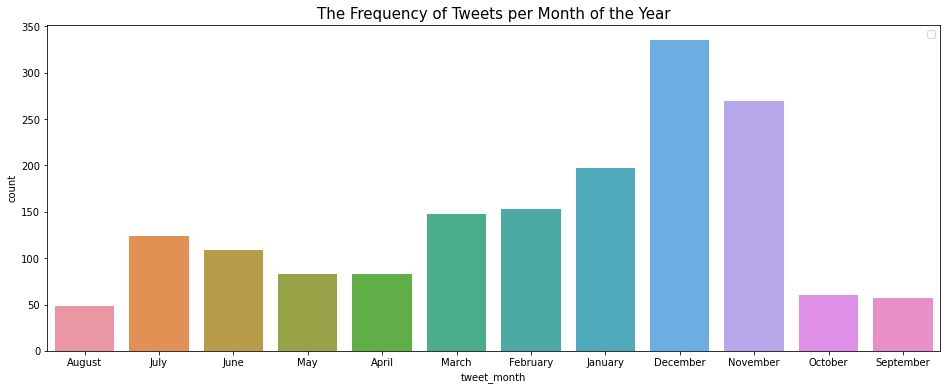

In [109]:
#show the count plot of the number of tweets per month of the year
plt.figure(figsize = (16, 6))
sns.countplot(x = 'tweet_month', data = cleaned_twitter_archieve)
plt.legend()
plt.title('The Frequency of Tweets per Month of the Year', size =15)


- This shows that there are more tweets during december than other month of the year

In [110]:
#check tweet frequency of each month of year
cleaned_twitter_archieve['tweet_month'].value_counts()

December     335
November     269
January      197
February     153
March        148
July         124
June         109
May           83
April         83
October       60
September     57
August        48
Name: tweet_month, dtype: int64

In [111]:
#store the frequency of tweet per year
tweet_year= cleaned_twitter_archieve['tweet_year'].value_counts()

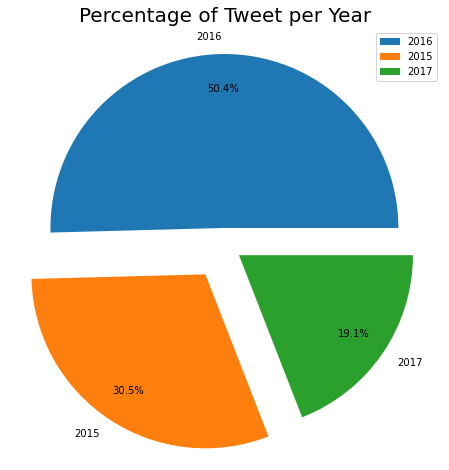

In [112]:
#show the percentage plot of the number of tweets per year
pie,ax=plt.subplots(figsize = [15, 8]) 
labels = tweet_year.keys()
plt.pie(x = tweet_year, autopct = "%.1f%%", explode =[0.1, 0.2, 0.1], labels = labels, pctdistance = 0.8)
plt.legend()
plt.title ("Percentage of Tweet per Year", size = 20);

- This show that there are alot of tweets in the year 2016 than other recorded year

In [113]:
#check tweet frequency per year
tweet_year

2016    840
2015    508
2017    318
Name: tweet_year, dtype: int64

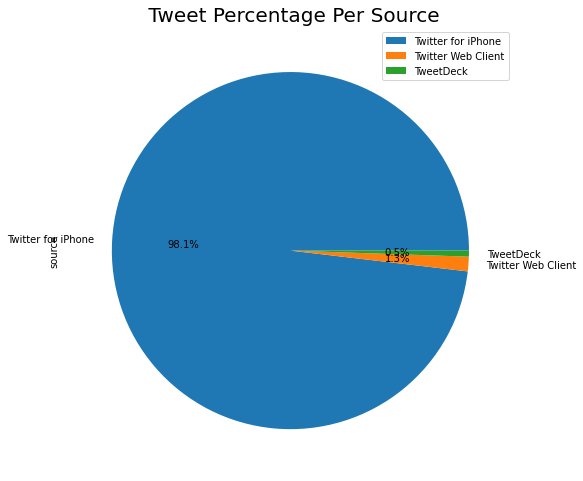

In [114]:
#show the count plot of the where each tweet come from.
plt.figure(figsize=(8,15))
cleaned_twitter_archieve['source'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend()
plt.title(' Tweet Percentage Per Source', size = 20)
plt.show()

- This pie chart shows that most tweets are from iphone

In [115]:
#check for the frequency of each tweet source
cleaned_twitter_archieve['source'].value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

Text(0.5, 1.0, 'Counts Per Dogs Stage Name')

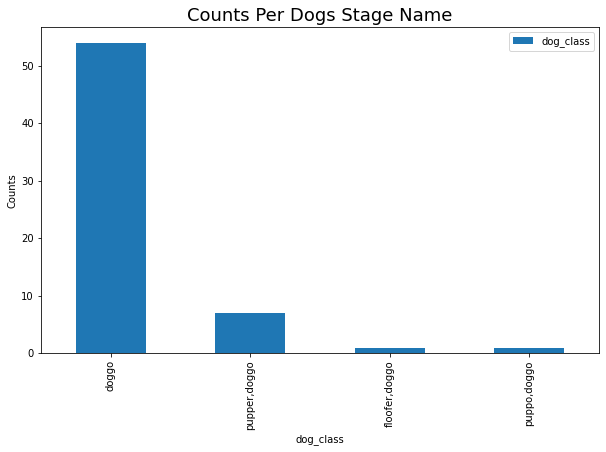

In [116]:
#Show the most commom Dog stage name by counts
plt.figure(figsize = (10,6))
cleaned_twitter_archieve['dog_class'].value_counts().plot.bar()
plt.legend()
plt.xlabel('dog_class')
plt.ylabel('Counts')
plt.title('Counts Per Dogs Class Name', size = 18)

In [123]:
cleaned_twitter_archieve['dog_class'].value_counts()

doggo            54
pupper,doggo      7
floofer,doggo     1
puppo,doggo       1
Name: dog_class, dtype: int64

Text(0.5, 1.0, 'Correlation between retweet_count and favorite_count')

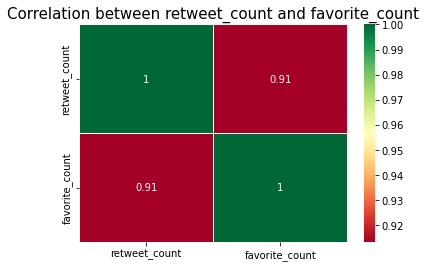

In [117]:
#correlation between retweet_count and favorite_count with heapmap
count_cor = cleaned_twitter_archieve.iloc[:, 12:14]
heatmap  =sns.heatmap (count_cor.corr(), annot = True, cmap = 'RdYlGn', linewidths = .8)
plt.title('Correlation between retweet_count and favorite_count', size =15)

- The correlation between the retweet count and the favorite count is 0.91

Text(0.5, 1.0, 'Top dog names by average retweet_count')

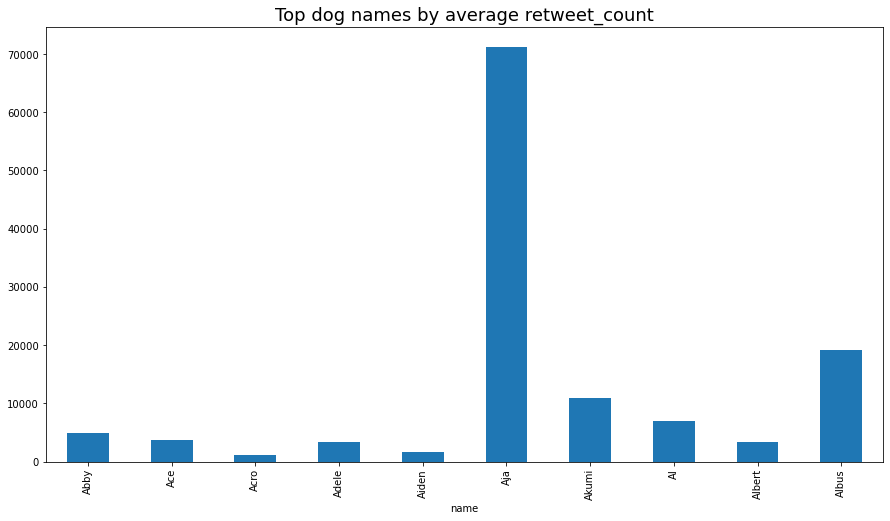

In [118]:
#Show the best dogs name  per average retweet_count
plt.figure(figsize=(15,8))
cleaned_twitter_archieve.groupby("name")["favorite_count"].mean().head(10).plot.bar()
plt.title("Top dog names by average retweet_count", size=18)

- The name Aja tends to have the highest favorite retween

Text(0.5, 1.0, 'Top dogs breed by average retweet_count')

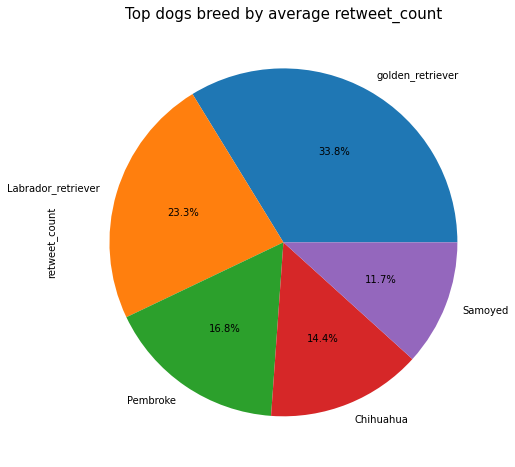

In [119]:
#Show top 5 best dogs breed based on retweet_count
plt.figure(figsize=(12,8))
cleaned_twitter_archieve.groupby("dog_breed")["retweet_count"].sum().sort_values().nlargest(5).plot.pie(autopct="%1.1f%%")
plt.title("Top dogs breed by average retweet_count", size=15)

- This shows that the golden retriever has the highest retweet count